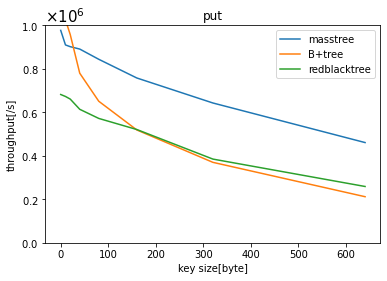

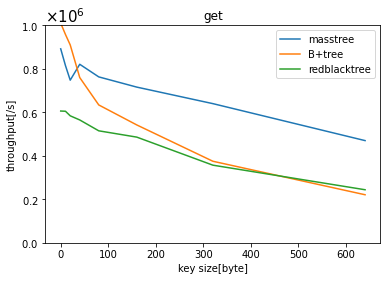

In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot
import matplotlib.ticker as ptick

size_array = [0, 10, 20, 40, 80, 160, 320, 640]
#size_array = [0,80,640]
def makefigure(operation):
    results_mass = []
    results_b = []
    results_rb =[]
    results_hm = []
    if(operation == 0):
        op = "put"
    if(operation == 1):
        op = "get"
    if(operation == 2):
        op = "getrange"
    if(operation == 3):
        op = "delete"


    for sz in size_array:
        df = pd.read_csv("data/"+str(sz)+'prefix_20random(substring_removed).csv')
        results_mass += df['Masstree'].values.tolist()
        results_b += df['B+tree'].values.tolist()
        results_rb += df['RedBlackTree'].values.tolist()
        results_hm += df['HashMap'].values.tolist()

    result_mass = []
    result_b = []
    result_rb = []
    result_hm = []
        
    # put
    for i in range(len(size_array)):
        result_mass.append(results_mass[i*4+operation])
        result_b.append(results_b[i*4+operation])
        result_rb.append(results_rb[i*4+operation])
        result_hm.append(results_hm[i*4+operation])
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
    ax.yaxis.offsetText.set_fontsize(15)
    ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    pyplot.title(op)
    pyplot.xlabel('key size[byte]')
    pyplot.ylabel('throughput[/s]')
    pyplot.plot(size_array, result_mass, label='masstree')
    pyplot.plot(size_array, result_b, label='B+tree')
    pyplot.plot(size_array, result_rb, label='redblacktree')
    #pyplot.plot(size_array, result_hm, label='hashmap')
    pyplot.legend()
    pyplot.ylim(0,1000000)
    pyplot.savefig("graphs/" + op + "_10000000keys_new.svg")
    pyplot.show()
makefigure(0)
makefigure(1)
#makefigure(2)
#makefigure(3)